In [22]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr
import seaborn as sns; sns.set()
from sklearn.cluster.bicluster import SpectralCoclustering

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")

In [23]:
base_dir = 'C:/Users/peter/2080Ti/Jupyter/Fabian_experiment/result_correlation/Cardiomegaly/'
file_name = 'Cardiomegaly_result.csv'
pd_file = os.path.join(base_dir, file_name)
label_dir = 'C:/NIH/co_occurrence_5000/Cardiomegaly/'
label_name = 'Cardiomegaly_random_label.np.npy'
label_file = os.path.join(label_dir, label_name)
Cardiomegaly_df = pd.read_csv(pd_file)
random_label = np.load(label_file)

In [24]:
Cardiomegaly_df['Control label'] = random_label
Cardiomegaly_df.head()
Cardiomegaly_df.columns

,Image Index,prob_Atelectasis,prob_Cardiomegaly,prob_Consolidation,prob_Edema,prob_Effusion,prob_Emphysema,prob_Fibrosis,prob_Hernia,prob_Infiltration,prob_Mass,prob_Nodule,prob_Pleural_Thickening,prob_Pneumonia,prob_Pneumothorax,Control label
0,image_0.png,0.051024,0.915020,0.008951,0.004040,0.116431,0.002792,0.032216,0.004974,0.166030,0.002464,0.025703,0.013170,0.013886,0.002769,0.714219
1,image_1.png,0.082106,0.465809,0.014689,0.019047,0.189878,0.008849,0.008803,0.005035,0.106389,0.012594,0.032974,0.030718,0.008984,0.012405,0.722042
2,image_2.png,0.102829,0.410340,0.021784,0.008375,0.153792,0.007843,0.008138,0.001536,0.178770,0.005739,0.016892,0.047637,0.010314,0.029840,0.348686
3,image_3.png,0.060972,0.042881,0.008271,0.001943,0.034423,0.008830,0.011635,0.003310,0.199761,0.006690,0.032404,0.008064,0.005020,0.003860,0.225958
4,image_4.png,0.029641,0.006863,0.006022,0.000553,0.012684,0.004532,0.021382,0.005671,0.109240,0.009439,0.033675,0.008916,0.006298,0.005803,0.045388


Index(['Image Index', 'prob_Atelectasis', 'prob_Cardiomegaly',
       'prob_Consolidation', 'prob_Edema', 'prob_Effusion', 'prob_Emphysema',
       'prob_Fibrosis', 'prob_Hernia', 'prob_Infiltration', 'prob_Mass',
       'prob_Nodule', 'prob_Pleural_Thickening', 'prob_Pneumonia',
       'prob_Pneumothorax', 'Control label'],
      dtype='object')

In [25]:
X = Cardiomegaly_df['Control label'].values
Y = []
Y_0 = X
Y_1 = Cardiomegaly_df['prob_Cardiomegaly'].values
Y_2 = Cardiomegaly_df['prob_Fibrosis'].values
Y.append(Y_1)
Y.append(Y_2)
#Y.append(Y_0)
label = ['Cardiomegaly (Corr=0.80)', 'Fibrosis (Corr=-0.07)']

(0, 1.0)

(0.0001, 1.3)

Text(0.5, 0, 'Control label in GAN')

Text(0, 0.5, 'Classification')

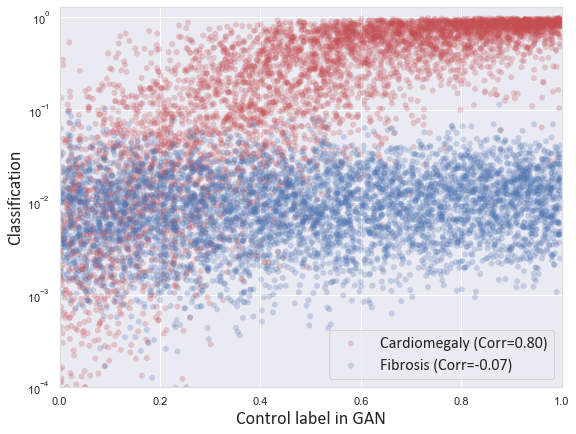

In [28]:
import matplotlib.font_manager as font_manager
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(9,7))
#ax.tick_params(direction='out', length=6, width=2, colors='r')

i = 0
for color in ['r', 'b']:
    plt.scatter(X, Y[i], c=color,
               alpha=0.25, edgecolors='none', label=label[i])
    i += 1

#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0, 1.0])
ax.set_ylim([1e-4, 1.3])
#ax.set_xticks(np.arange(0, 1.1, step=0.1))

ax.set_xlabel('Control label in GAN', fontsize=18, fontname="Calibri")
ax.set_ylabel('Classification', fontsize=18, fontname="Calibri")

#ax.set_facecolor('none')

ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

font = font_manager.FontProperties(family='Calibri',
                                   style='normal', size=16)
ax.legend(prop=font)
plt.savefig('scatter.png', dpi=200, bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Calculate correlation matrix

In [6]:
base_dir_df = 'C:/Users/peter/2080Ti/Jupyter/Fabian_experiment/result_correlation/'
base_dir_np = 'C:/NIH/co_occurrence_5000/'
labels = [
            'Atelectasis',
            'Cardiomegaly',
            'Effusion',
            'Infiltration',
            'Mass',
            'Nodule',
            'Pneumonia',
            'Pneumothorax',
            'Consolidation',
            'Edema',
            'Emphysema',
            'Fibrosis',
            'Pleural_Thickening',
            'Hernia']
labels = sorted(labels)

In [7]:
correlation_df = pd.DataFrame(index=labels, columns=labels)
correlation_df.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Atelectasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cardiomegaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for label in labels:
    file_name = label+'_result.csv'
    dir_df = os.path.join(base_dir_df, label)
    pd_file = os.path.join(dir_df, file_name)
    
    label_name = label+'_random_label.np.npy'
    dir_np = os.path.join(base_dir_np, label)
    label_file = os.path.join(dir_np, label_name)
    
    result_df = pd.read_csv(pd_file)
    random_label = np.load(label_file)
    index_control = label
    if len(result_df) == random_label.shape[0]:
        columns = result_df.columns[1:]
        for column in columns:
            if column == 'prob_Pleural_Thickening':
                column_class = 'Pleural_Thickening'
            else:
                column_class = column.split('_')[1]
            Y = result_df[column]
            X = random_label
            correlation_df.loc[index_control][column_class] = pearsonr(X, Y)[0]

In [9]:
#correlation_df.values.astype(float)
correlation_df=correlation_df.convert_objects(convert_numeric=True)
#correlation_df = raw_correlation_df.round(decimals=3)

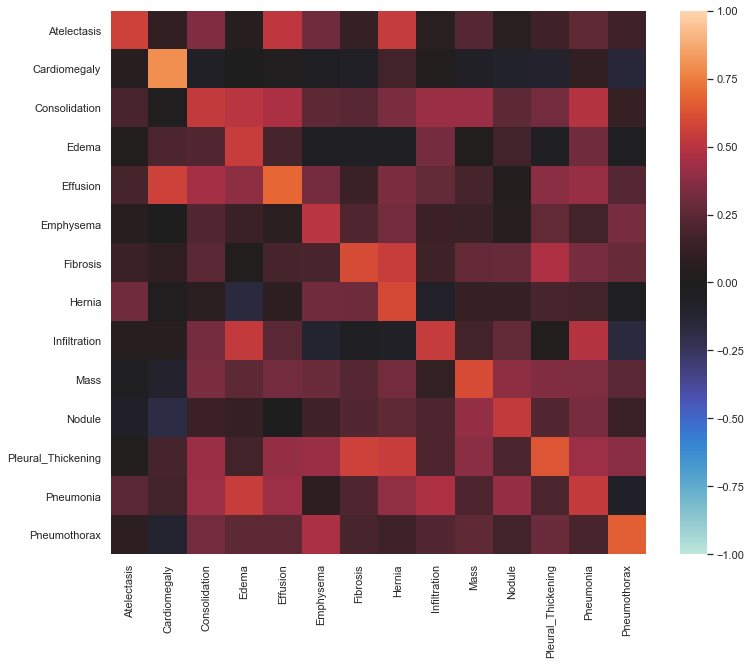

In [10]:
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(correlation_df.T,center=0, vmin=-1.0, vmax=1.0, annot=False, cbar_kws={"ticks":[-1.0,-0.25, -0.5,
                                                                                                      -0.75, 0.0, 0.25,
                                                                                                      0.5, 0.75, 1.0]})
f.savefig('heatmap.svg', dpi=800)

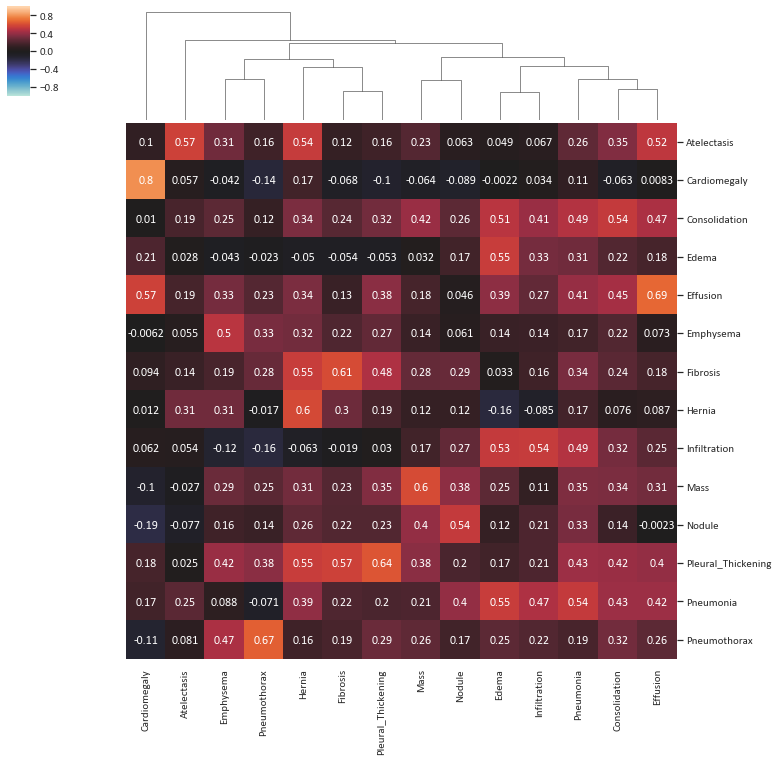

In [11]:
sns.set(font = 'Calibri')
sns.clustermap(correlation_df.T, annot=True, center=0, vmin=-1.0, vmax=1.0,
              figsize=(12,12), row_cluster=False)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

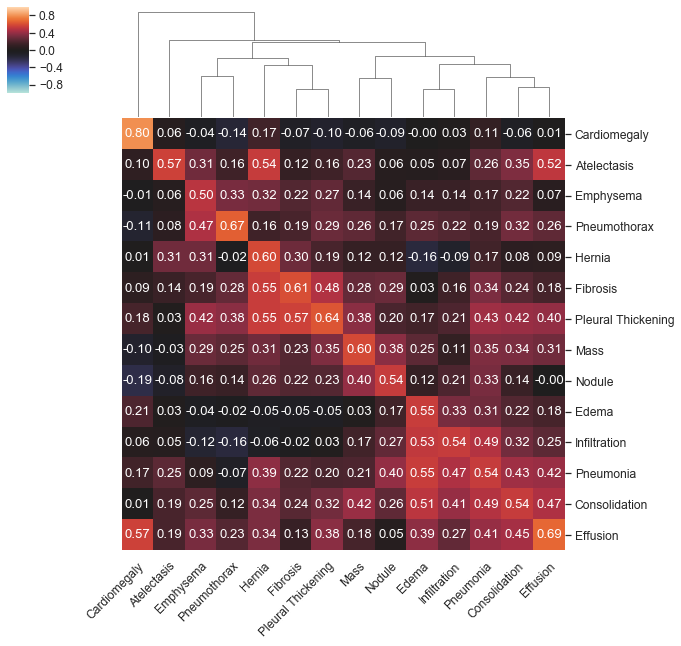

In [20]:
labels_cluster = [
            'Cardiomegaly',
            'Atelectasis',
            'Emphysema',
            'Pneumothorax',
            'Hernia',
            'Fibrosis',
            'Pleural_Thickening',
            'Mass',
            'Nodule',
            'Edema',
            'Infiltration',
            'Pneumonia',           
            'Consolidation',
            'Effusion'
]
labels_cluster[6] = 'Pleural Thickening'
sns.set(font_scale=1.1)
correlation_df = correlation_df.rename(columns={'Pleural_Thickening': 'Pleural Thickening'})
correlation_df = correlation_df.rename(index={'Pleural_Thickening': 'Pleural Thickening'})
correlation_df = correlation_df.reindex_axis(labels_cluster, axis=1)
correlation_df = correlation_df.round(2)
correlation_df.to_csv('cluster.csv')
clustermap = sns.clustermap(correlation_df.T, annot=True, center=0, vmin=-1.0, vmax=1.0,
              figsize=(10,10), row_cluster=False, col_cluster=True, fmt='.2f')
plt.setp(clustermap.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


clustermap.savefig("output.svg")

(14, 14)

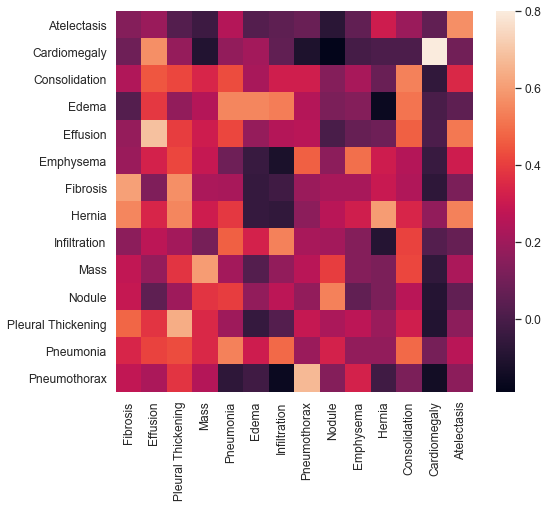

In [13]:
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
x = correlation_df.values
x.shape
d = sch.distance.pdist(x)
L = sch.linkage(d, method='average')
ind = sch.fcluster(L, 0.5*d.max())
columns = [correlation_df.columns.tolist()[i] for i in list((np.argsort(ind)))]

df = correlation_df.reindex_axis(columns, axis=1)

f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df, annot=False)

['Atelectasis',
 'Edema',
 'Infiltration',
 'Pneumothorax',
 'Nodule',
 'Consolidation',
 'Emphysema',
 'Hernia',
 'Fibrosis',
 'Effusion',
 'Cardiomegaly',
 'Mass',
 'Pleural Thickening',
 'Pneumonia']

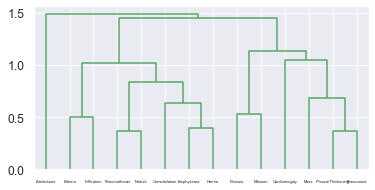

In [14]:
fig, axes = plt.subplots(figsize=(6, 3))
dend = dendrogram(linkage(d, method='complete'), 
           color_threshold=2, 
           leaf_font_size=4,
           labels = correlation_df.columns)
dend['ivl']